# Case Study : Hypothesis Testing

<b>Problem Statement:<b>
    
Perform hypothesis testing on different parameters related to bicycle renting on different days of the week.
    
1. Is average number of cycles rented during working day and non-working day are the same?
2. What will be the difference between number of cycles rented during working day and non-working day?
3. Are the average number of cycles rented during different seasons same?
4. Are average number of cycles rented during different weathers same?
5. Are the season and weather dependent w.r.t. cycles rented during the particular weather and season?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics
import warnings
import matplotlib.cm as cm
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
import math

In [2]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(10886, 12)

In [5]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [6]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [7]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [8]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [9]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [10]:
df['temp'].nunique()

49

In [11]:
df['atemp'].nunique()

60

In [12]:
df['humidity'].nunique()

89

In [13]:
df['windspeed'].nunique()

28

# df.info()
1. No null values observed 
2. Data typs look good

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [16]:
df.duplicated().sum()

0

# df.describe()
1. Measures of central tendency and quantiles look good for continuous variables -
2. temp
3. atemp
4. humidity
5. windspeed
6. Doesn't feel necessity of looking for outliers

In [17]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

# Pairplot 
1. To get visual representation of correlation between different variables
2. Some parameters are showing strong correlation e.g. temp and atemp
3. More details on correlation between variables are shown in correlation triangle

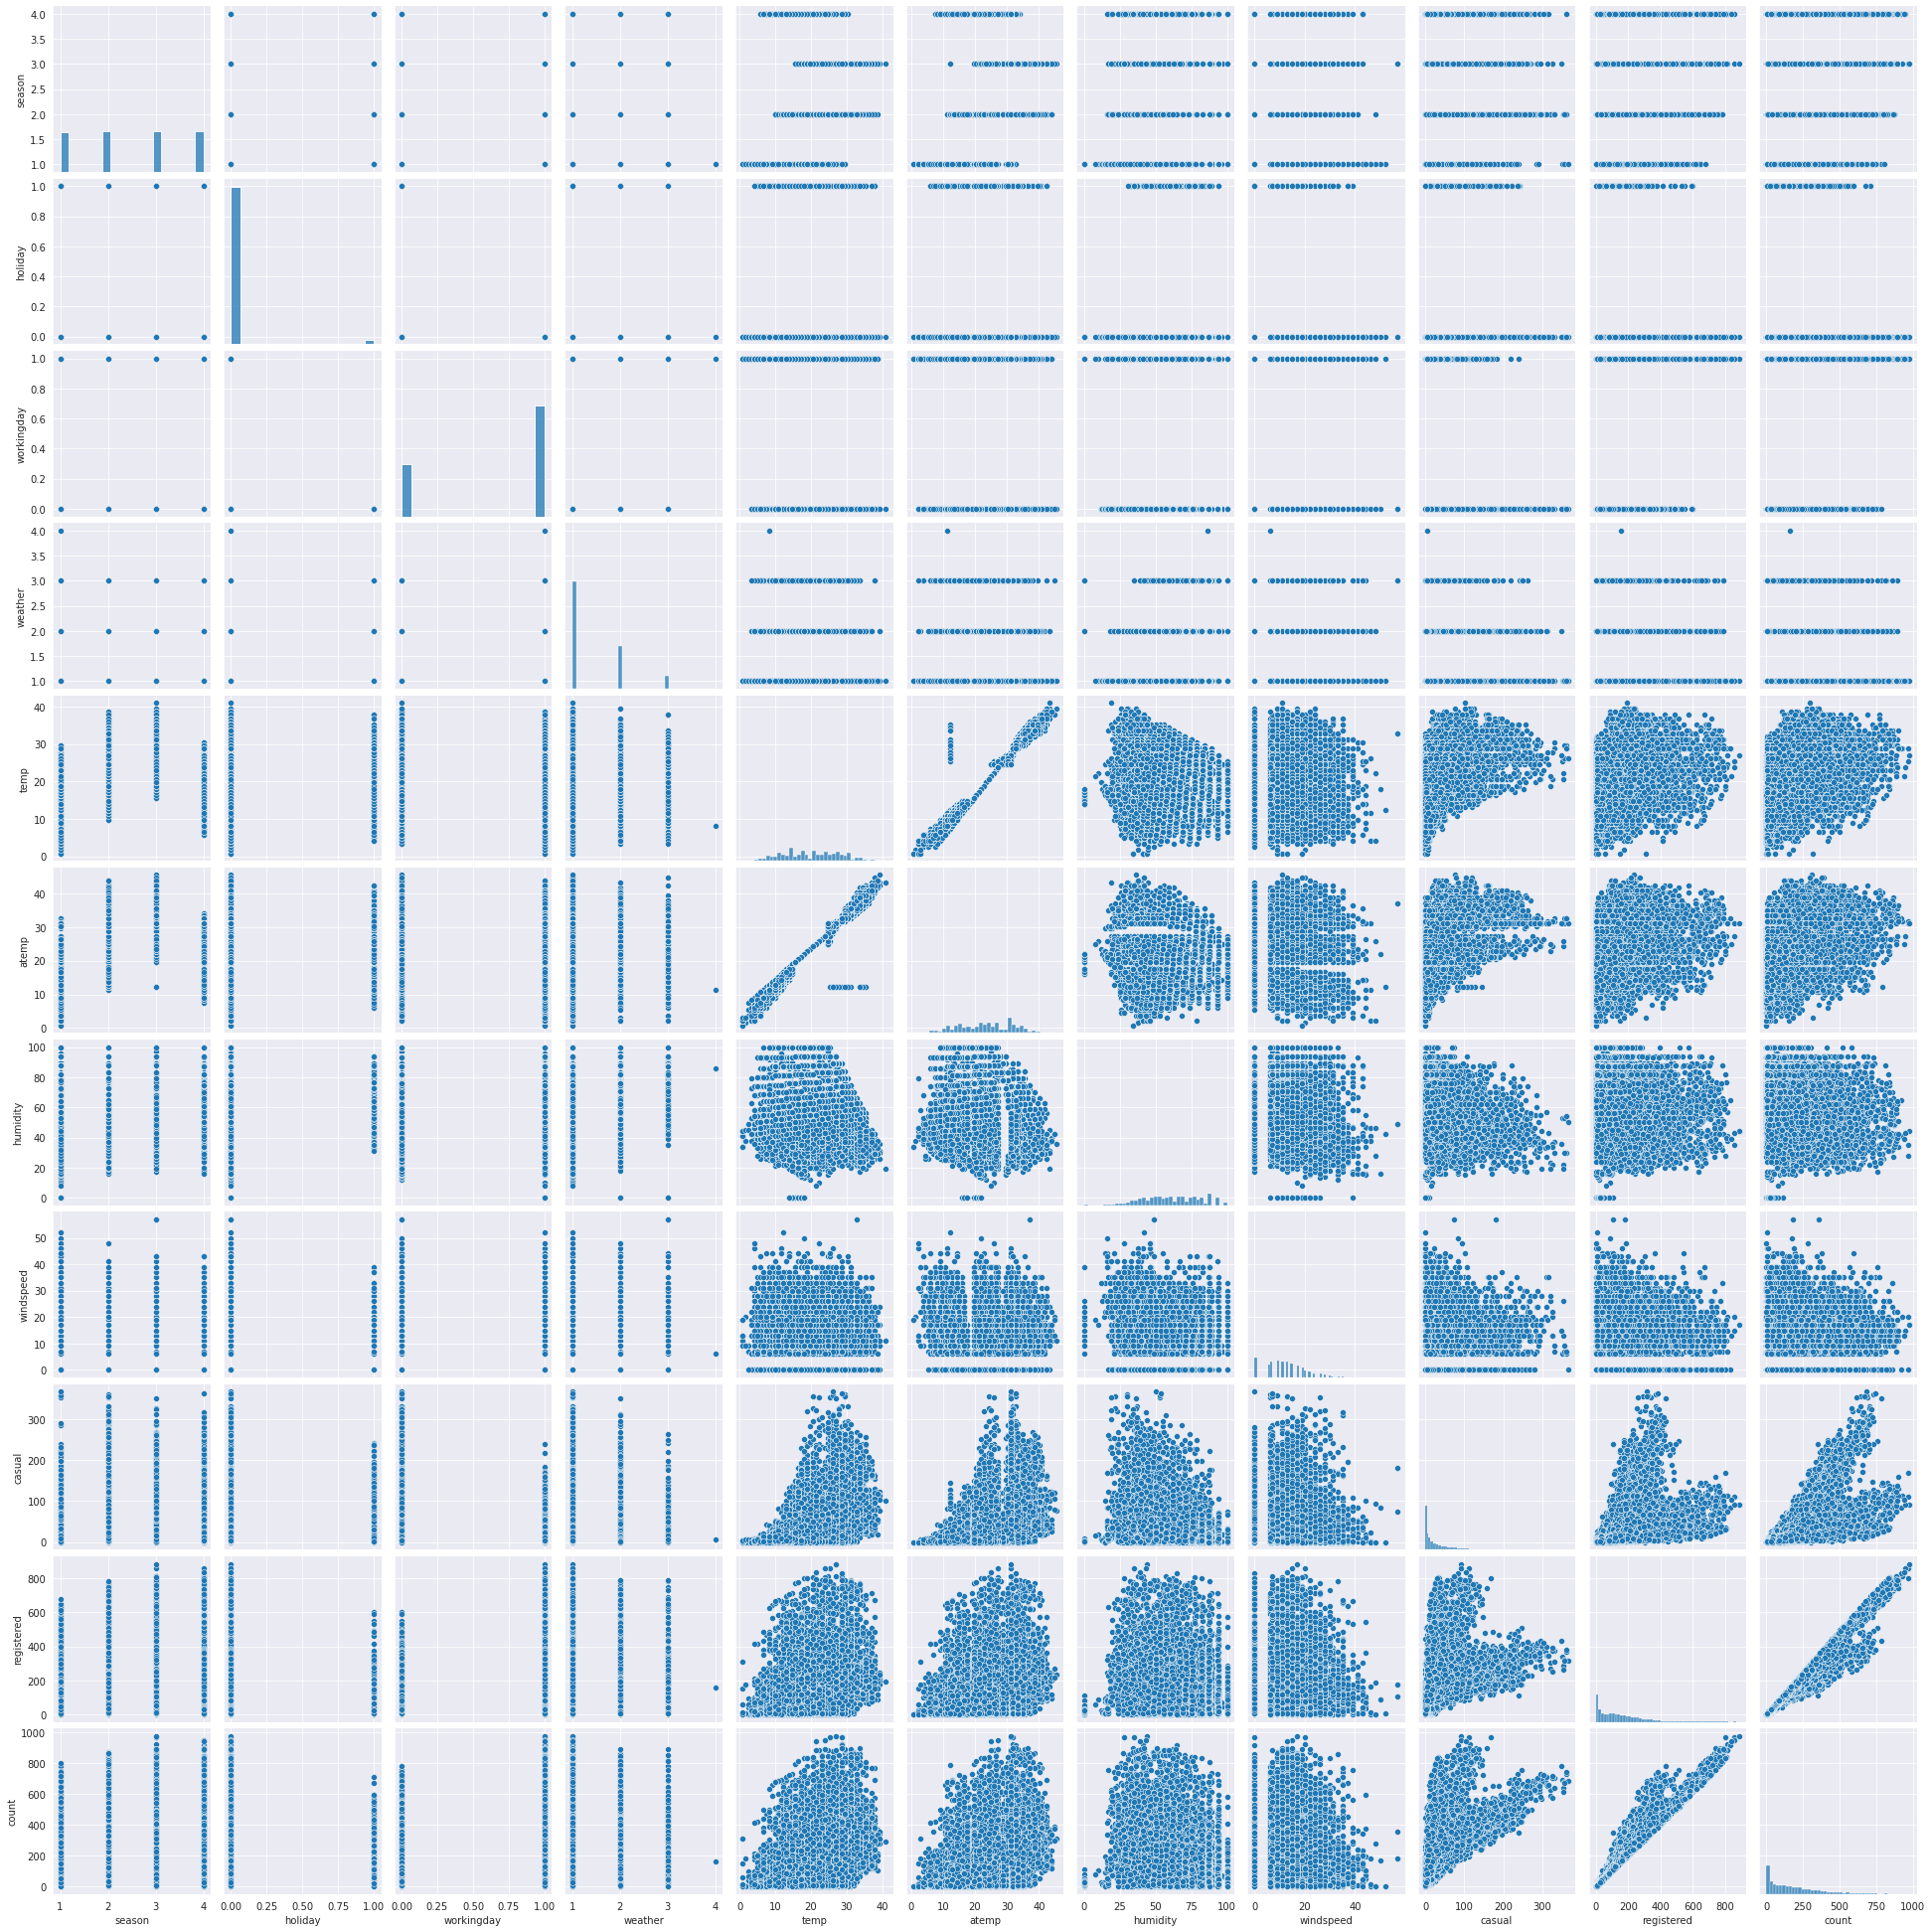

In [18]:
plt.rcParams['figure.figsize'] = (12,8)
sns.pairplot(df)
plt.show()

In [19]:
df_correl = df.corr()

In [20]:
df_correl

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610  -0.147121  0.096758    0.164011  0.163439  
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393  
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655  
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371  
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  
registered -0.265458   0.091052  0.497250    1.000000  0.970948  
count      -0.317371   0.101369  0.690414    0.970948  1.000000

# Heatmap: Correlation Triangle
1. Strong positive correlation between temp and atemp
2. Positive correlation between temp/atemp and numbers of cycles rented
3. Negative correlation between humidity and windspeed
4. Negative correlation between humidity and number of cycles rented
5. Positive correlation between weather and humidity

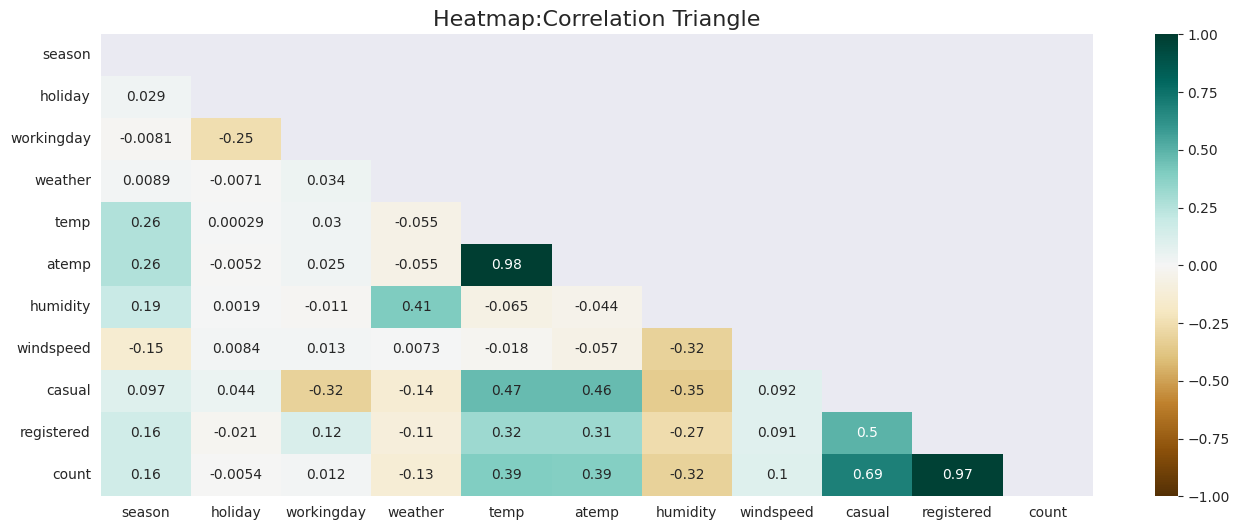

In [21]:
plt.rcParams['figure.figsize'] = (16,6)
mask = np.triu(np.ones_like(df_correl, dtype=np.bool_))
heatmap = sns.heatmap(df_correl, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap:Correlation Triangle', fontdict={'fontsize':16})
plt.show()

# Seasonwise distribution of number of cycles rented
1. The distribution looks almost similar for season 2,3 and 4
2. In season 1 the number of customers renting cycles fall down rapidly after 100 count
3. In season 2,3,4, the number of customers renting cycles fall gradually after the peak

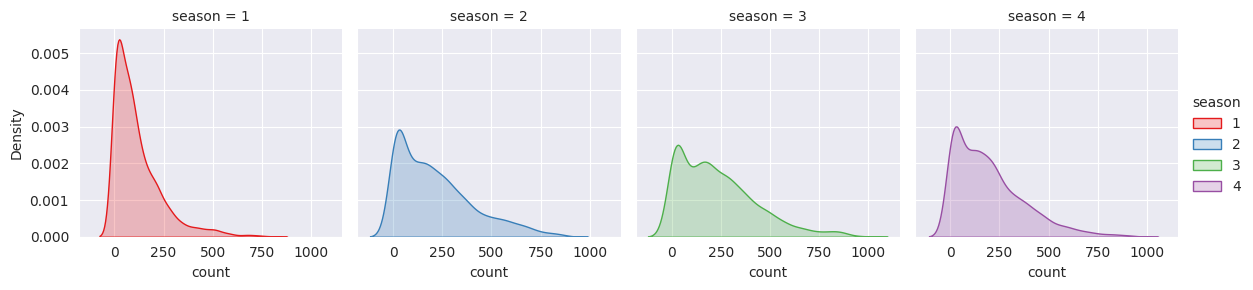

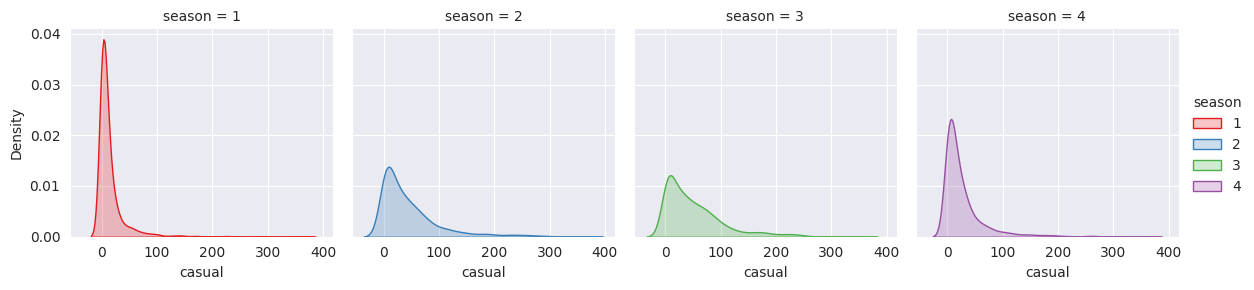

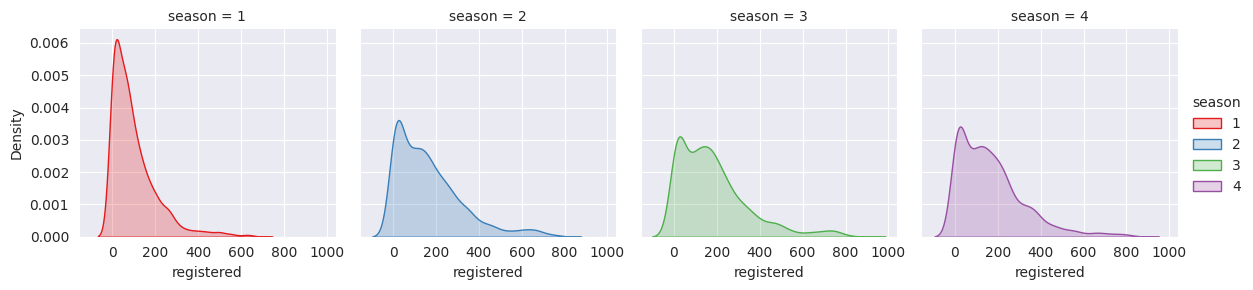

In [22]:
plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='season',size=3,aspect=1, hue='season', palette='Set1')
g.map(sns.kdeplot, 'count', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='season',size=3,aspect=1, hue='season', palette='Set1')
g.map(sns.kdeplot, 'casual', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='season',size=3,aspect=1, hue='season', palette='Set1')
g.map(sns.kdeplot, 'registered', shade=True)
g.add_legend()
plt.show()

# Distribution of Customer renting cycles based on holiday = 0 or 1
1. The distribution and spread looks similar

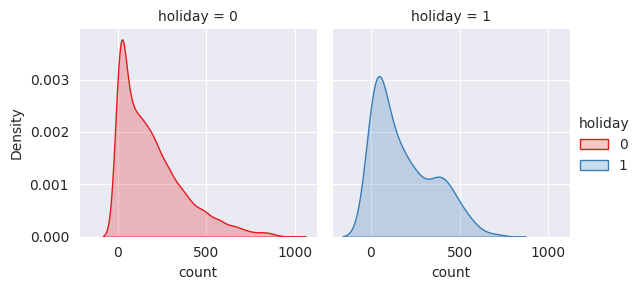

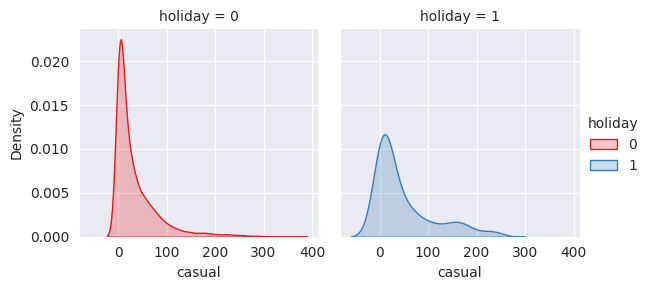

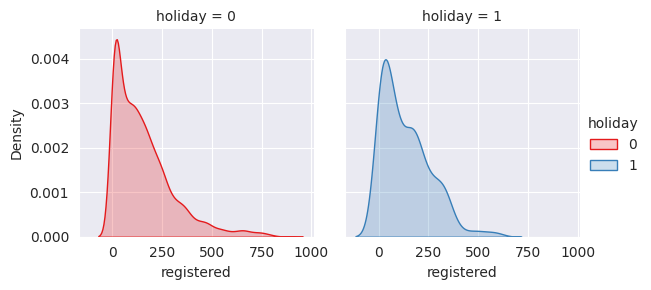

In [23]:
plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='holiday',size=3,aspect=1,hue='holiday', palette='Set1')
g.map(sns.kdeplot, 'count', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='holiday',size=3,aspect=1,hue='holiday', palette='Set1')
g.map(sns.kdeplot, 'casual', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='holiday',size=3,aspect=1,hue='holiday', palette='Set1')
g.map(sns.kdeplot, 'registered', shade=True)
g.add_legend()
plt.show()

# Distribution of cycles rented based on working/non-working day
1. The distribution looks almost similar. There is no significant change in the two disbs

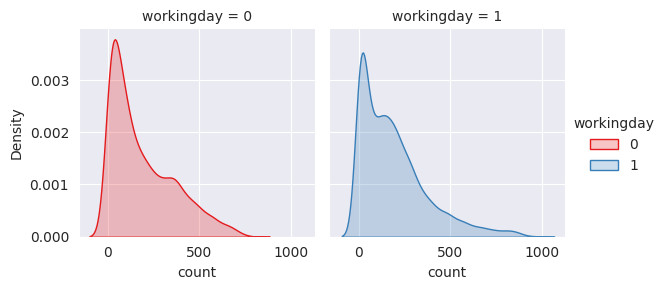

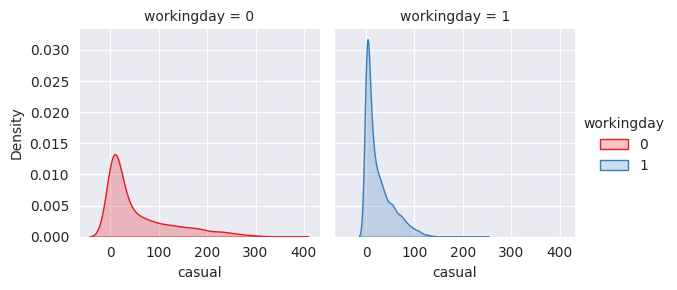

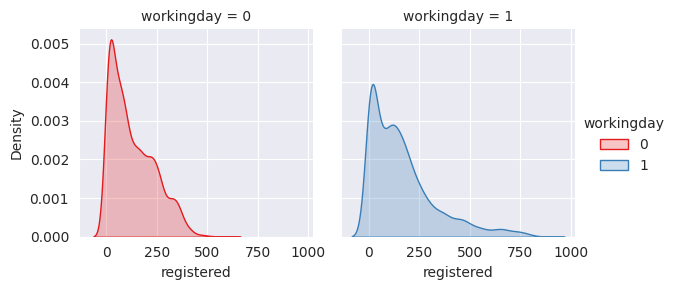

In [24]:
plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='workingday', size=3, aspect=1, hue='workingday', palette='Set1')
g.map(sns.kdeplot, 'count', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='workingday', size=3, aspect=1, hue='workingday', palette='Set1')
g.map(sns.kdeplot, 'casual', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='workingday', size=3, aspect=1, hue='workingday', palette='Set1')
g.map(sns.kdeplot, 'registered', shade=True)
g.add_legend()
plt.show()

# Weather-wise distribution of cycles rented
1. Weather 1 and 2 shows almost similar distribution
2. Weather 1 and 2 shows gradual fall in count of cycles rented after the peak
3. Weather 3 shows steep fall in the count of cycles rented after the peak

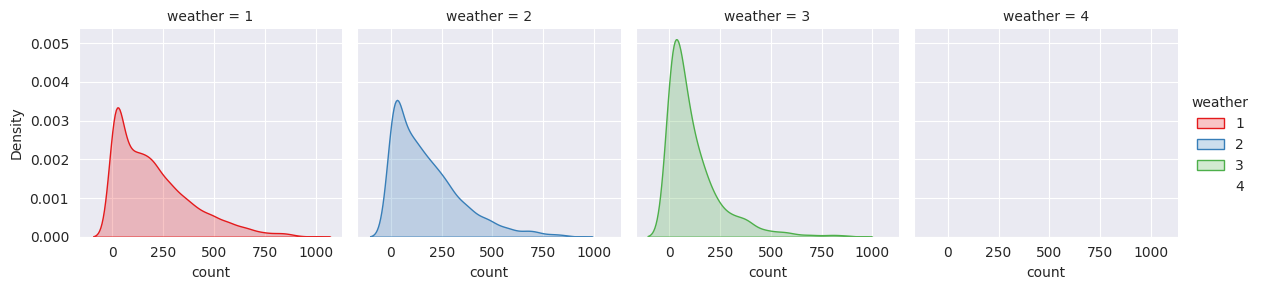

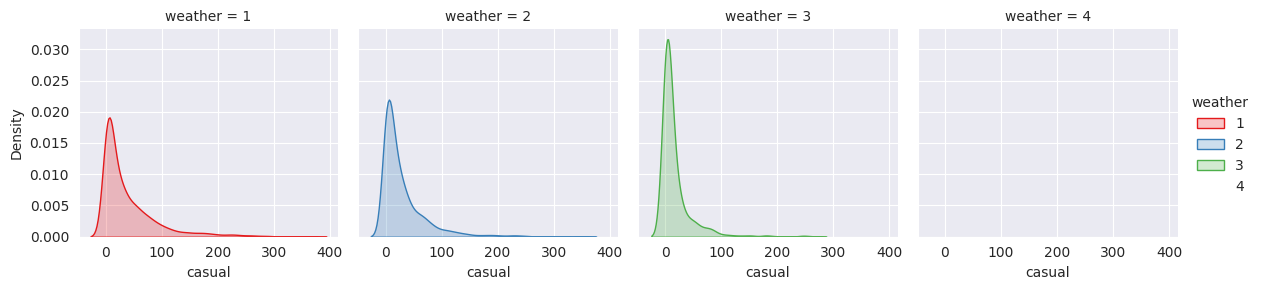

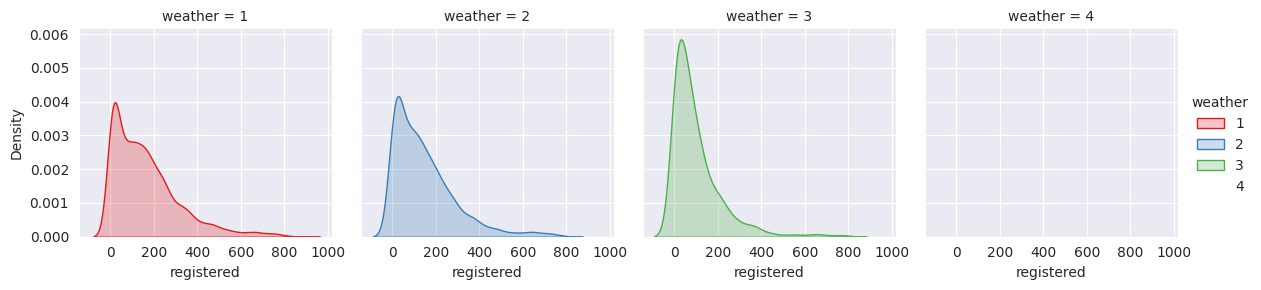

In [25]:
plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='weather', size=3, aspect=1, hue='weather', palette='Set1')
g.map(sns.kdeplot, 'count', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='weather', size=3, aspect=1, hue='weather', palette='Set1')
g.map(sns.kdeplot, 'casual', shade=True)
g.add_legend()
plt.show()

plt.rcParams['figure.figsize'] = (16,10)
g = sns.FacetGrid(df, col='weather', size=3, aspect=1, hue='weather', palette='Set1')
g.map(sns.kdeplot, 'registered', shade=True)
g.add_legend()
plt.show()

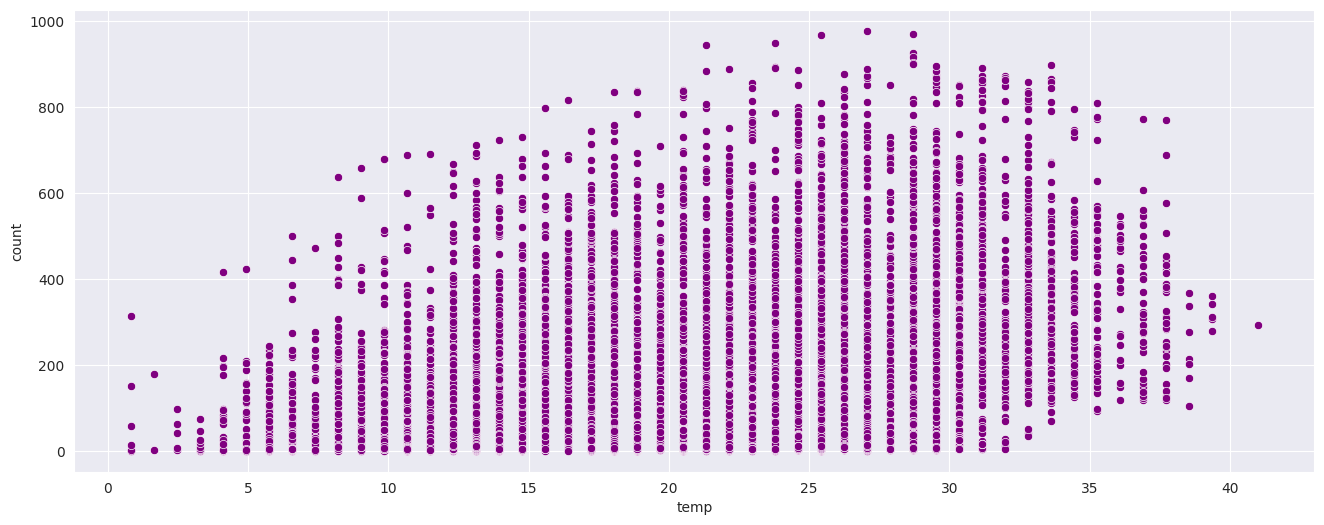

In [26]:
plt.rcParams['figure.figsize'] = (16,6)
sns.scatterplot(data=df, x='temp', y='count', color='purple', palette='deep')
plt.show()

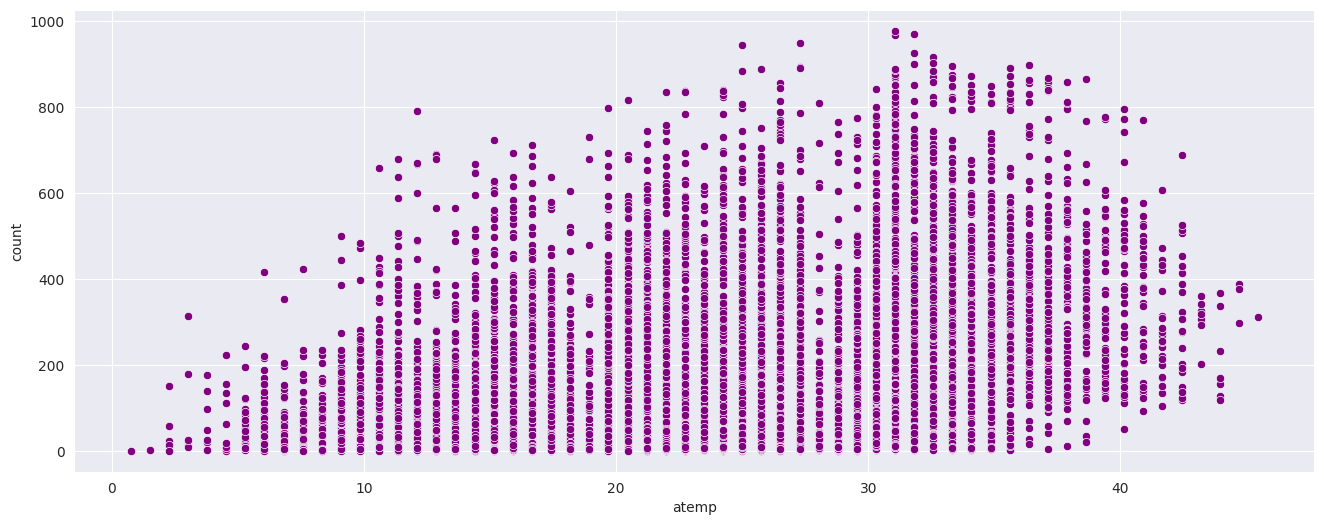

In [27]:
plt.rcParams['figure.figsize'] = (16,6)
sns.scatterplot(data=df, x='atemp', y='count',color='purple', palette='deep')
plt.show()

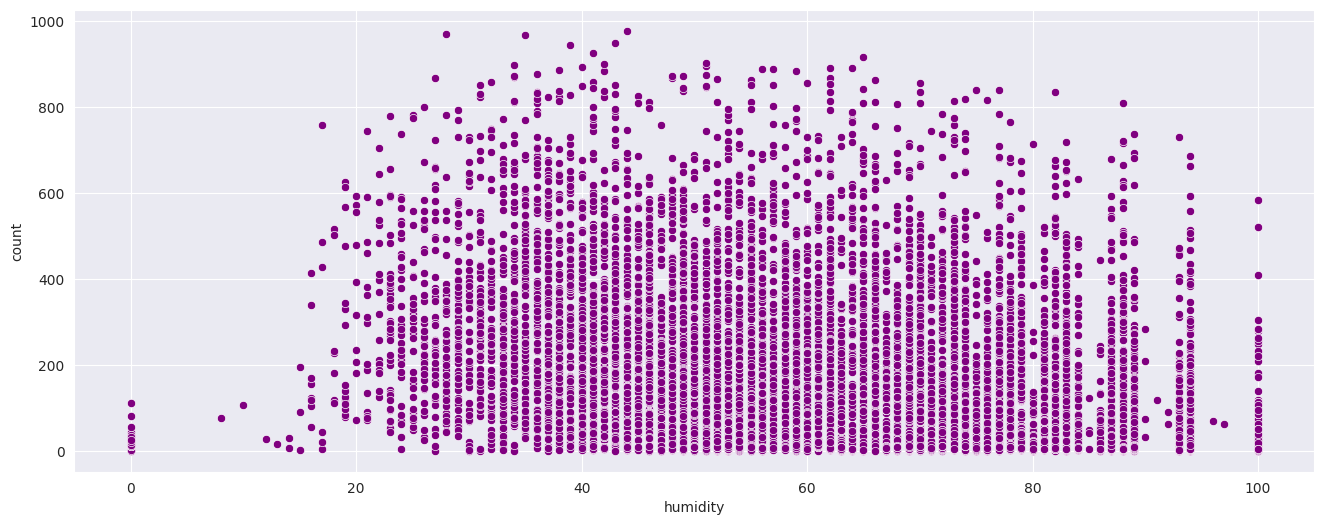

In [28]:
plt.rcParams['figure.figsize'] = (16,6)
sns.scatterplot(data=df, x='humidity', y='count', color='purple', palette='deep')
plt.show()

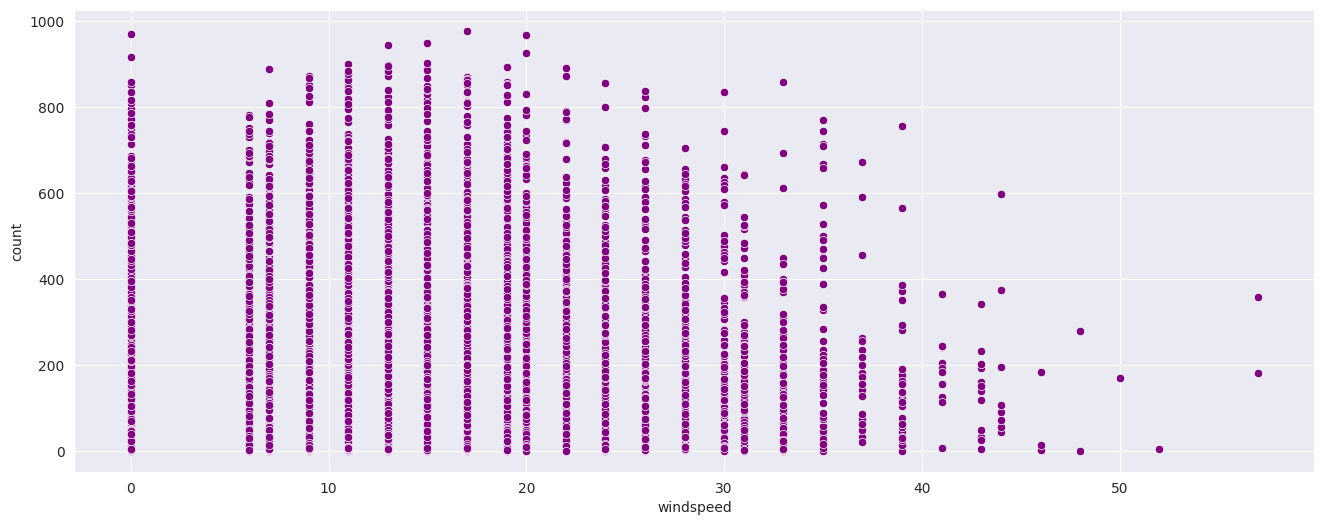

In [29]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.scatterplot(data=df, x='windspeed', y='count', color='purple', palette='deep')
plt.show()

# Two sample Z Test 
1. Compare Means of counts of cycles rented for working and non-working day.
2. Samples should be indepedent.
3. Distributions of samples need not be gaussian.
4. Samples should follow CLT assumptions - (pop.mean and std.dev are finite, std.dev are known or estimatable).
5. As number of samples are > 30, we will do 2-Samaple Z-test here for alpha = 5%.

# Define null and alternate hypothesis
1. H0: Average number of cycles rented on working day = average number of cycles rented on non-working day
2. Ha: Average number of cycles rented on working day <> average number of cycles rented on non-working day

In [30]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [31]:
workingday0 = df.loc[df['workingday'] == 0]
workingday1 = df.loc[df['workingday'] == 1]

# Plot distribution of two samples
1. Sample1: Working day = 0
2. Sample2: Working day = 1 

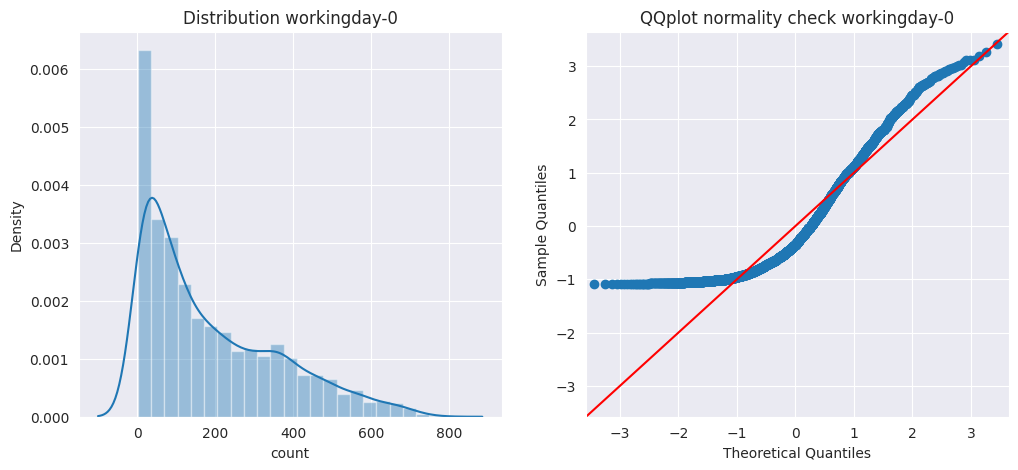

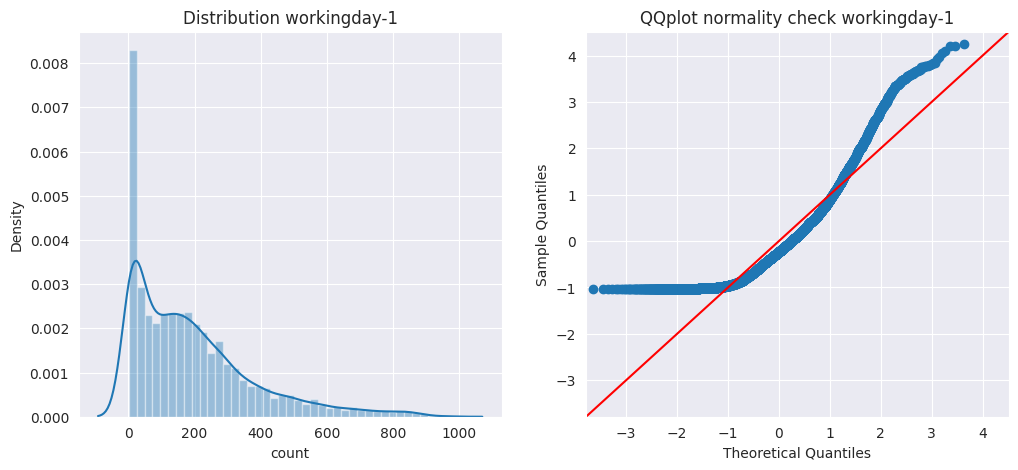

In [32]:
plt.rcParams['figure.figsize'] = (12,5)
fig = plt.figure()

ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution workingday-0')
sns.distplot(workingday0['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQplot normality check workingday-0')
sm.qqplot(workingday0['count'], line='45', fit=True, ax=ax)

plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution workingday-1')
sns.distplot(workingday1['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQplot normality check workingday-1')
sm.qqplot(workingday1['count'], line='45', fit=True, ax=ax)

plt.show()

# Plot CDFs of two samples
1. Sample1: Working day = 0
2. Sample2: Working day = 1

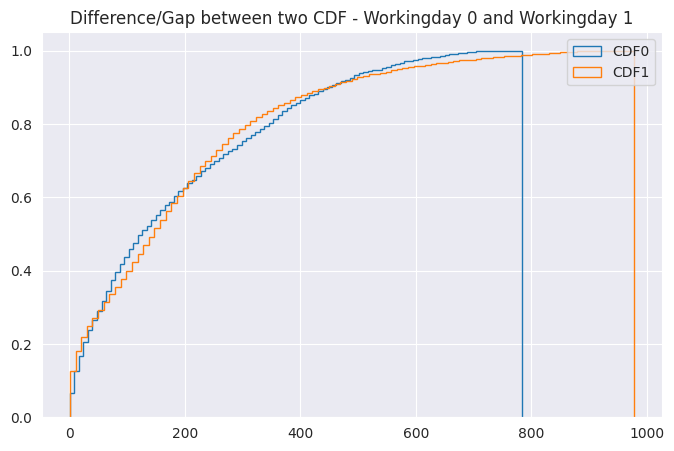

In [33]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.hist(workingday0['count'], bins=100, cumulative=True, label='CDF0', density=True, histtype='step')
plt.hist(workingday1['count'], bins=100, cumulative=True, label='CDF1', density=True, histtype='step')
plt.title('Difference/Gap between two CDF - Workingday 0 and Workingday 1')
plt.legend()
plt.show()

# Calculate Test-statistics
1. T-Distribution follows gaussian ~ N(0, 1)

In [34]:
#Perform Z-test
ztest(workingday1['count'], workingday0['count'])

(1.2096277376026694, 0.22642176970306893)

# Calculate T-Critical

In [35]:
#Calculate T-critical at 5% significance level for Gaussian distribution
scipy.stats.norm.ppf(1-0.05/2)

1.959963984540054

# T-statistics comparison
1. T-observed = 1.2096277376026694
2. p-value = 0.22642176970306893
3. T-critical (alpha=5%) = 1.959963984540054
4. As T-observed < T-critical we failed to reject the null hypothesis H0
5. As p-value > alpha we failed to reject the null hypothesis H0

In [36]:
#Conclusion

# Conclusion
At 5% significance level, the average number of cycles rented on working day
is same as average number of cycles rented on non-working day

In [37]:
#2-Sample T-test

# 2-Sample T-Test
1. Even though the number of samples are more than 30, lets try 2-Sample T-Test
2. Samples should be independent
3. Distributions of samples need not be gaussian
4. Assumptions of CLT - pop mean and std. dev are finite and estimatable
5. With larger samples T-test will behave like z-test
6. Alpha = 5%

In [38]:
dof = workingday0['count'].shape[0] + workingday1['count'].shape[0] - 2

# Calculate T-statistics

In [39]:
scipy.stats.ttest_ind(workingday1['count'], workingday0['count'])

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

# Calculate T-Critical

In [40]:
scipy.stats.t.ppf(q=1-0.05/2, df=dof)

1.9601819678713073

# T-statistics comparison
1. T-observed = 1.2096277376026694
2. p-value = 0.22644804226361348
3. T-critical (alpha=5%) = 1.9601819678713073
4. As T-observed < T-critical we failed to reject the null hypothesis H0
5. As p-value > alpha we failed to reject the null hypothesis H0

In [41]:
#Conclusion

# Conclusion
At 5% significance level, the average number of cycles rented on working day
is same as average number of cycles rented on non-working day

In [42]:
#Calculate Confidence interval for working/non-working day count of cycles rented
#Use alpha = 5%

# Confidence Interval using Z-distribution

In [43]:
#Check if the variances are similar or different
#This will determine if we need to use pooled estimate of S.E. or not

In [44]:
var1 = statistics.variance(workingday1['count'])
var2 = statistics.variance(workingday0['count'])

print('Var1(workingday): {}'.format(var1))
print('Var2(non-workingday): {}'.format(var2))
print('Ration of Var0 and Var1: {}'.format(var2/var1))

Var1(workingday): 34045.29037312209
Var2(non-workingday): 30180.033500640937
Ration of Var0 and Var1: 0.8864672079421395


In [150]:
#Variance Ratio : 0.88 which lies between 0.5 and 2
#Hence one variance is no more than double the other
#So, we use pooled estimate of the common standard deviation

In [46]:
print('Mean of workingday cycles rented count: {}'.format(np.mean(workingday1['count']).round()))
print('Mean of non-workingday cycles rented count: {}'.format(np.mean(workingday0['count']).round()))

Mean of workingday cycles rented count: 193.0
Mean of non-workingday cycles rented count: 189.0


In [47]:
n1 = workingday1['count'].shape[0]
n2 = workingday0['count'].shape[0]

x1bar = np.mean(workingday1['count'])
x2bar = np.mean(workingday0['count'])
#sp = pooled estimate of the common standard deviation
sp = math.sqrt((((n1-1)*var1) + ((n2-1)*var2))/(n1+n2-2))
p = scipy.stats.norm.ppf(0.05/2)
q = scipy.stats.norm.ppf(1-0.05/2)

point_estimate = (x1bar-x2bar)
stderror = sp*math.sqrt(1/n1+1/n2)
marginerror = np.array([p,q])*stderror

#confint = (x1bar-x2bar) + np.array([p,q])*sp*math.sqrt(1/n1 + 1/n2)

confint = point_estimate + marginerror

print('Confidence interval for 2-sample z-test: {}'.format(confint.round()))

Confidence interval for 2-sample z-test: [-3. 12.]


In [48]:
print(x1bar-x2bar)
print(stderror)
print(marginerror[1])

4.505252028716285
3.7244946429925037
7.299875360877674


# Interpretation of Confidence Interval
1. Significance level = 5%.
2. Our best estimate of the difference, the point estimate, is 193-189 = 4 units.
3. The standard error of the difference is 3.72 units.
4. The margin of error of the difference is 7.29 units.
5. We are 95% confident that the difference in mean cycles rented between working day and non-working day is between -3 and 12 units.
6. In this sample, the non-working day have lower mean cycles rented than the working day by 4 units.
7. Based on this confidence interval, we also conclude that there is no statistically significant difference in mean cycles rented between working and non-working day because the 95% confidence interval includes the null value, zero. 
8. The confidence interval is the range of likely values for the difference in means. Since, the interval contains zero (no difference), we do not have sufficient evidence to conclude that there is a difference. 

In [49]:
#Anova Test

# Anova
1. Assumptions of anova-
2. Each group should follow the gaussian distribution
3. Each group's variance is roughly the same
4. Each observation of independent
5. Under H0, test stat F ~ F.disb(k-1, n-k)

# Anova for Season

# Define Null and Alternate Hypothesis
1. H0: Mean count of cycles rented in season 1, season 2, season 3 and season 4 are same.
2. Ha: Mean count of cycles rented in season 1, season 2, season 3 and season 4 are different.

In [50]:
df['season'].unique()

array([1, 2, 3, 4])

In [51]:
season1 = df.loc[df['season'] == 1]
season2 = df.loc[df['season'] == 2]
season3 = df.loc[df['season'] == 3]
season4 = df.loc[df['season'] == 4]

In [52]:
print(season1.shape)
print(season2.shape)
print(season3.shape)
print(season4.shape)

(2686, 12)
(2733, 12)
(2733, 12)
(2734, 12)


# Plot distribution of season1/2/3/4 and corresponding QQ plot
1. Distributions of cycles rented in season1/2/3/4 are not gaussian

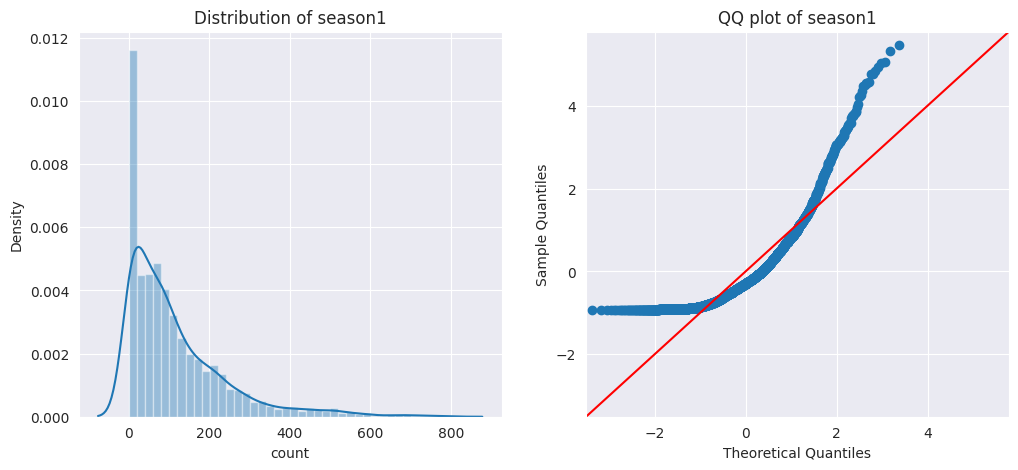

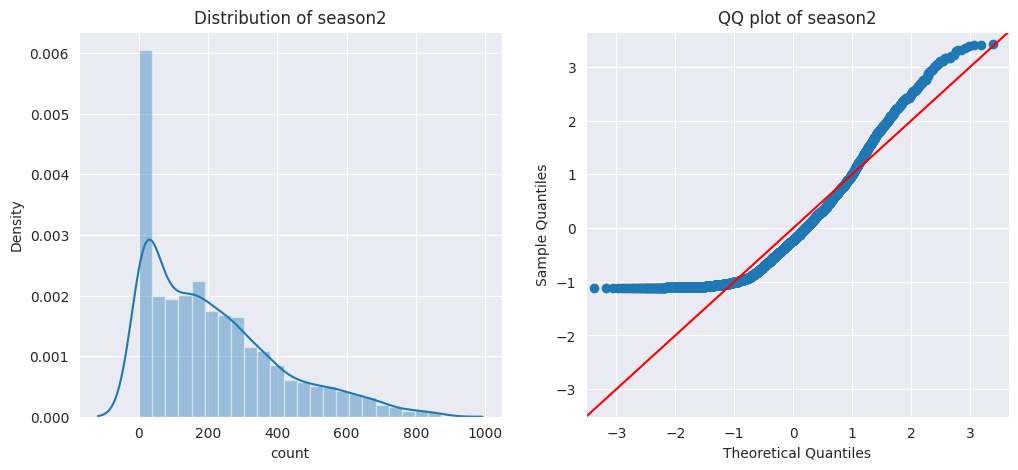

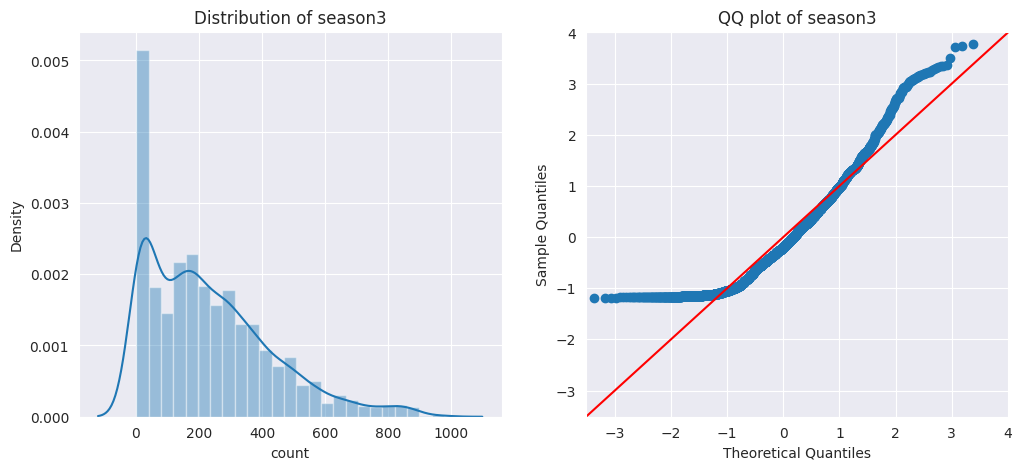

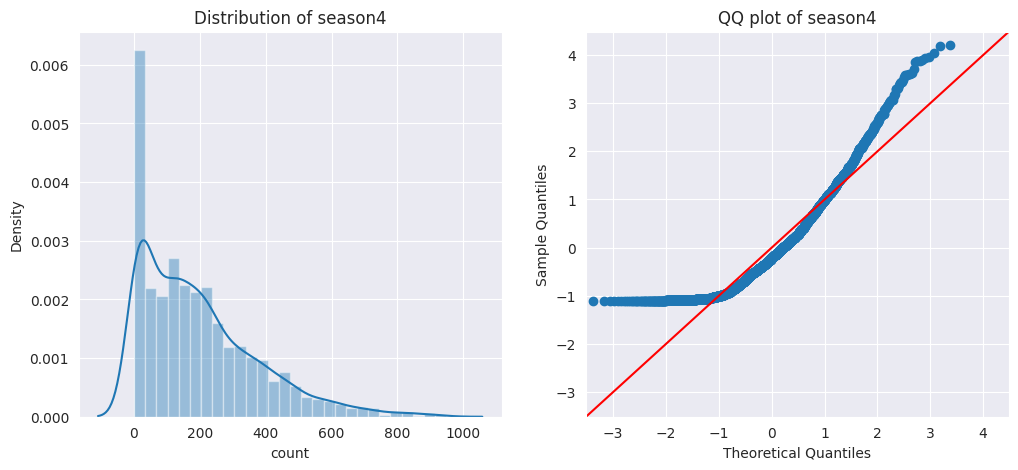

In [53]:
plt.rcParams['figure.figsize'] = (12,5)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of season1')
sns.distplot(season1['count'],ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of season1')
sm.qqplot(season1['count'],line='45',fit=True,ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of season2')
sns.distplot(season2['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of season2')
sm.qqplot(season2['count'], line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of season3')
sns.distplot(season3['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of season3')
sm.qqplot(season3['count'], line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of season4')
sns.distplot(season4['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of season4')
sm.qqplot(season4['count'], line='45', fit=True, ax=ax)
plt.show()

# Variances of season1/2/3/4
1. Variances are roughly same with exception of season1

In [54]:
print(statistics.variance(season1['count']))
print(statistics.variance(season2['count']))
print(statistics.variance(season3['count']))
print(statistics.variance(season4['count']))

15693.568533717142
36867.01182553241
38868.517012662865
31549.720316669303


# Plot distributions in same plot for season1/2/3/4

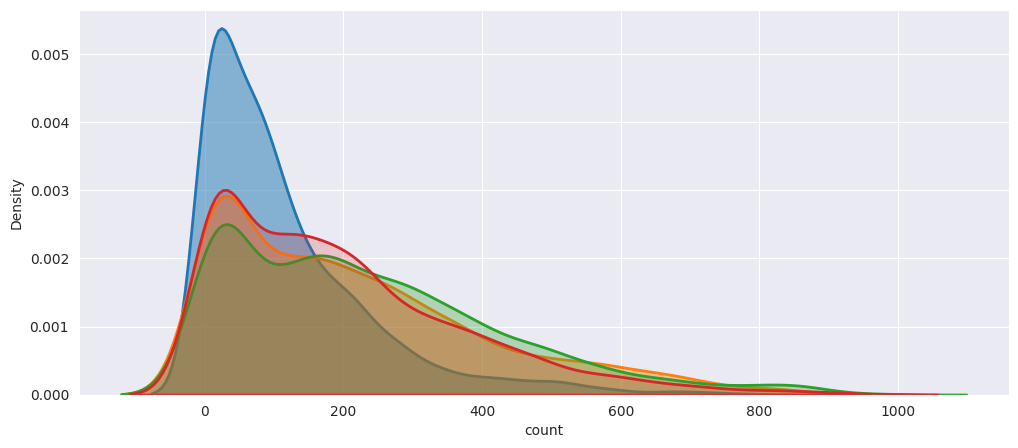

In [55]:
plt.rcParams['figure.figsize'] = (12,5)
sns.distplot(season1['count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.5})
sns.distplot(season2['count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.4})
sns.distplot(season3['count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.3})
sns.distplot(season4['count'],hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.2})
plt.show()

# BoxCox transformation to transform the distribution into gaussian

In [56]:
trans_season1, lambda_season1 = scipy.stats.boxcox(season1['count'])
trans_season2, lambda_season2 = scipy.stats.boxcox(season2['count'])
trans_season3, lambda_season3 = scipy.stats.boxcox(season3['count'])
trans_season4, lambda_season4 = scipy.stats.boxcox(season4['count'])

# Lambda values after boxcox transformation

In [57]:
print('Best lambda parameters for season1/2/3/4:')
print(lambda_season1)
print(lambda_season2)
print(lambda_season3)
print(lambda_season4)

Best lambda parameters for season1/2/3/4:
0.26334701570489333
0.34917159198958714
0.39342927924970933
0.35319186603471014


# Variances of season1/2/3/4 after BoxCox transformation
1. Variances are not roughly same after BoxCox transformation

In [58]:
print(statistics.variance(trans_season1))
print(statistics.variance(trans_season2))
print(statistics.variance(trans_season3))
print(statistics.variance(trans_season4))

16.251167937349496
44.694869434393674
66.1095013271526
42.43935997466594


# Plot Distributions of season1/2/3/4 and QQ plots after BoxCox transformation
1. The distributions are roughly gaussian after BoxCox transformation

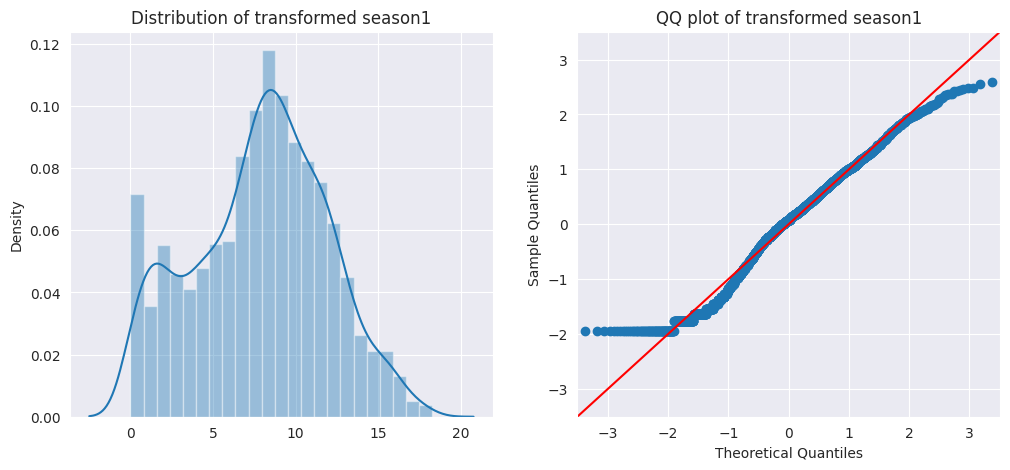

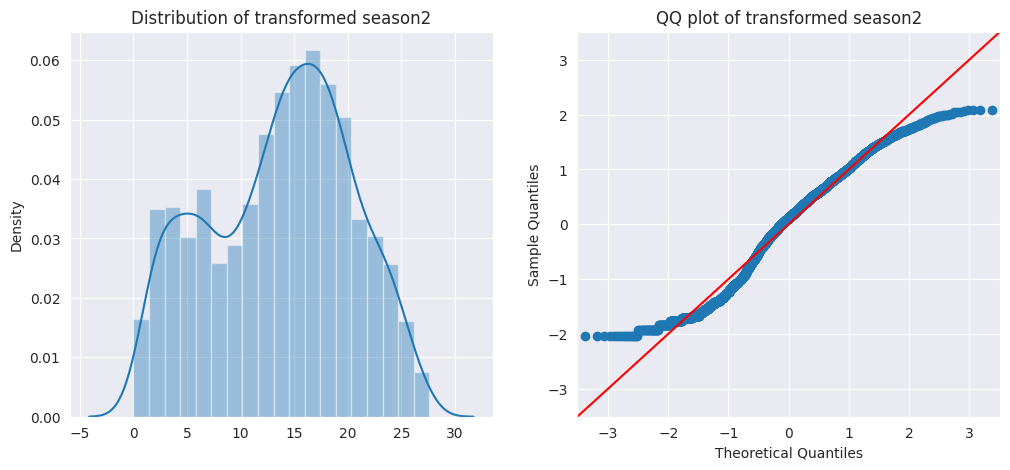

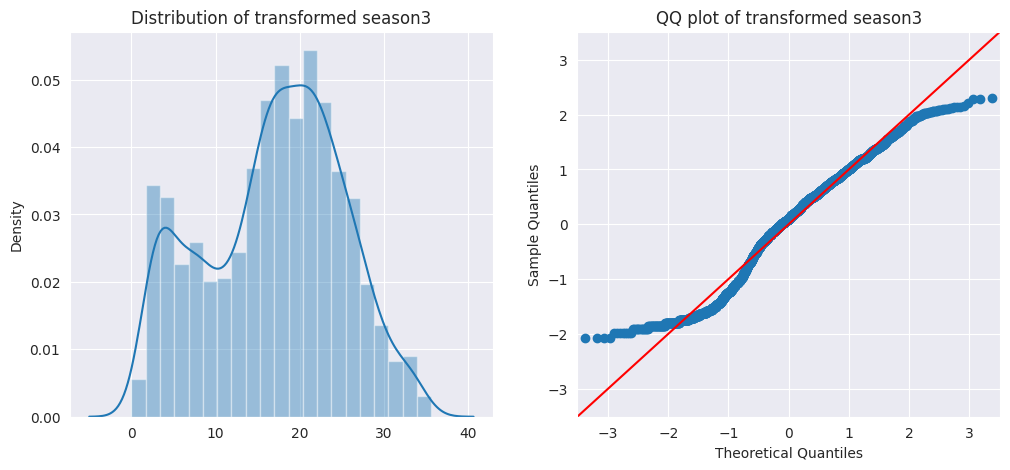

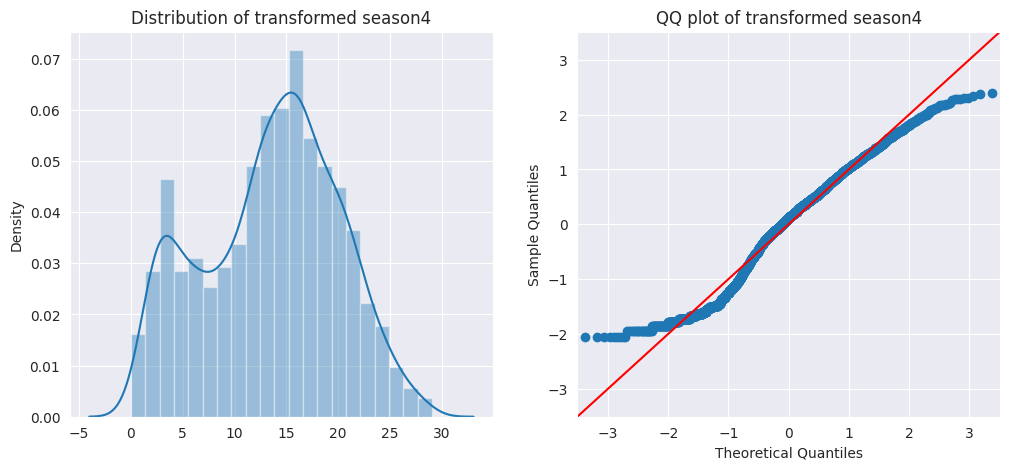

In [59]:
plt.rcParams['figure.figsize'] = (12,5)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed season1')
sns.distplot(trans_season1, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed season1')
sm.qqplot(trans_season1, line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed season2')
sns.distplot(trans_season2, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed season2')
sm.qqplot(trans_season2, line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed season3')
sns.distplot(trans_season3, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed season3')
sm.qqplot(trans_season3, line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed season4')
sns.distplot(trans_season4, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed season4')
sm.qqplot(trans_season4, line='45', fit=True, ax=ax)
plt.show()

# Plot all distributions in same plot after BoxCox transformation

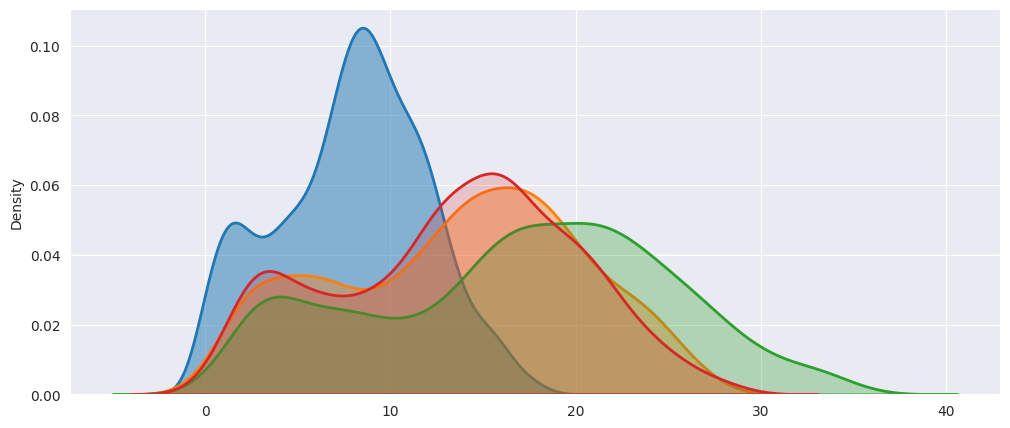

In [60]:
plt.rcParams['figure.figsize'] = (12,5)
sns.distplot(trans_season1,hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.5})
sns.distplot(trans_season2,hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.4})
sns.distplot(trans_season3,hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.3})
sns.distplot(trans_season4,hist=False,kde=True,kde_kws={'shade':True,'linewidth':2,'alpha':0.2})
plt.show()

# Verify mean values of transformed season1/2/3/4

In [61]:
print(np.mean(trans_season1))
print(np.mean(trans_season2))
print(np.mean(trans_season3))
print(np.mean(trans_season4))

7.8639470386426895
13.642905694810976
16.871654102012343
13.450978156043494


# ANOVA F-test statistics for season1/2/3/4 

In [62]:
#One way Anova Test for season1/2/3/4
scipy.stats.f_oneway(trans_season1,trans_season2,trans_season3,trans_season4)

F_onewayResult(statistic=890.4936156746095, pvalue=0.0)

# ANOVA F-test statistics for season2/3/4

In [63]:
#One way Anova Test for season2/3/4
scipy.stats.f_oneway(trans_season2,trans_season3,trans_season4)

F_onewayResult(statistic=197.6465669437121, pvalue=1.474574596383665e-84)

# Interpretation at 5% significance level
1. p-value < alpha (0 < 0.05)
2. Since p-value is very very small and close to zero we reject the null hypothesis

# Conclusion
1. The average count of cycles rented in season1/2/3/4 is not same
2. The average count of cycles rented differs in different seasons

# Anova for weather

In [64]:
#Define Null and Alternate hypothesis

# Define Null and Alternate Hypothesis
1. H0: Mean count of cycles rented in weather 1, weather 2, weather 3 and weather 4 are same.
2. Ha: Mean count of cycles rented in weather 1, weather 2, weather 3 and weather 4 are different.

In [65]:
df['weather'].unique()

array([1, 2, 3, 4])

In [66]:
weather1 = df.loc[df['weather'] == 1]
weather2 = df.loc[df['weather'] == 2]
weather3 = df.loc[df['weather'] == 3]
weather4 = df.loc[df['weather'] == 4]

In [67]:
print(weather1.shape)
print(weather2.shape)
print(weather3.shape)
print(weather4.shape)

(7192, 12)
(2834, 12)
(859, 12)
(1, 12)


# Plot distribution of weather1/2/3/4 and corresponding QQ plot
1. Distributions of cycles rented in weather1/2/3/4 are not gaussian
2. Since there is not enough data available for weather4 no-data will be shown in the plot

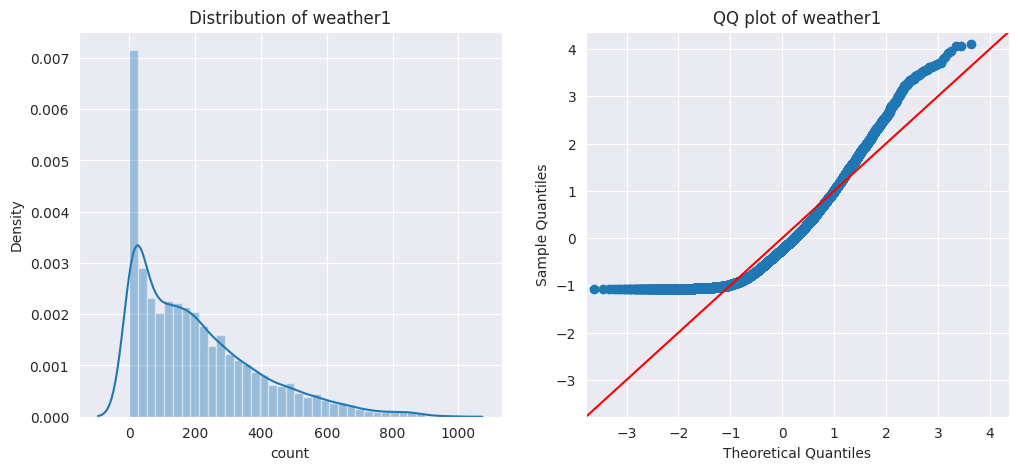

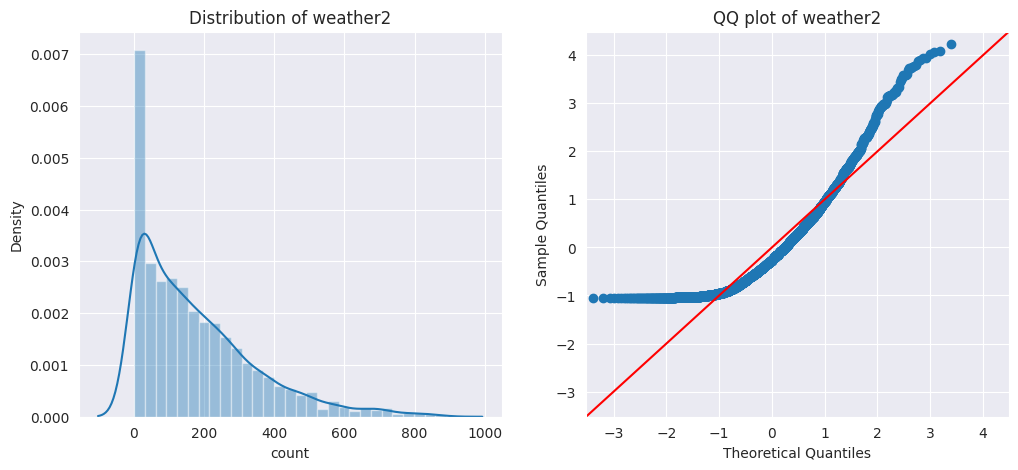

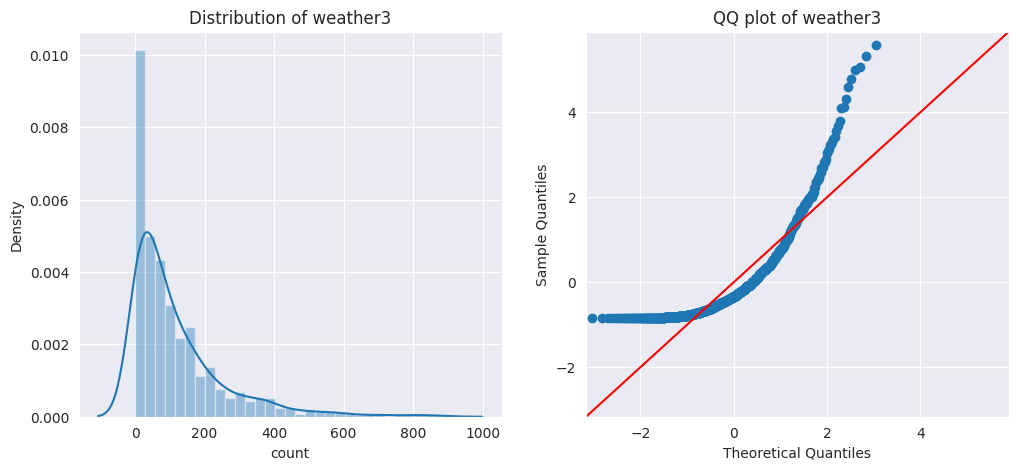

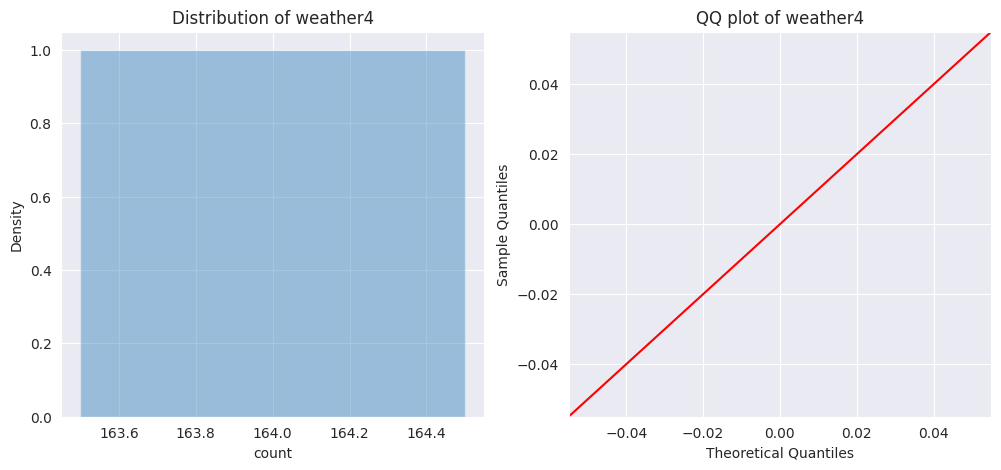

In [68]:
plt.rcParams['figure.figsize'] = (12,5)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of weather1')
sns.distplot(weather1['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of weather1')
sm.qqplot(weather1['count'], line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of weather2')
sns.distplot(weather2['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of weather2')
sm.qqplot(weather2['count'], line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of weather3')
sns.distplot(weather3['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of weather3')
sm.qqplot(weather3['count'], line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of weather4')
sns.distplot(weather4['count'], ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of weather4')
sm.qqplot(weather4['count'], line='45', fit=True, ax=ax)
plt.show()

# Variances of the different weathers - 1/2/3
1. Variance of the weather are not roughly same

In [69]:
print(statistics.variance(weather1['count']))
print(statistics.variance(weather2['count']))
print(statistics.variance(weather3['count']))
#print(statistics.variance(weather4['count']))

35328.79846268022
28347.2489933018
19204.77589271419


# Plot all distributions in single plot

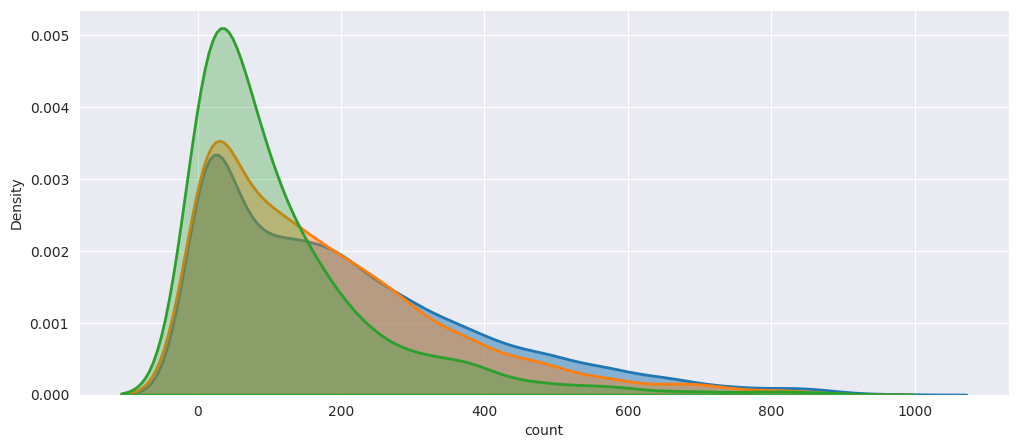

In [70]:
plt.rcParams['figure.figsize'] = (12,5)
sns.distplot(weather1['count'], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.5})
sns.distplot(weather2['count'], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.4})
sns.distplot(weather3['count'], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.3})
#sns.distplot(weather4['count'], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.2})
plt.show()

# Perform boxcox transformation to transform the weather distributions to roughly gaussian

In [71]:
trans_weather1, lambda_weather1 = scipy.stats.boxcox(weather1['count'])
trans_weather2, lambda_weather2 = scipy.stats.boxcox(weather2['count'])
trans_weather3, lambda_weather3 = scipy.stats.boxcox(weather3['count'])
#trans_weather4, lambda_weather4 = scipy.stats.boxcox(weather4['count'])

In [72]:
print('Best lambda paramters for weather 1/2/3')
print(lambda_weather1)
print(lambda_weather2)
print(lambda_weather3)

Best lambda paramters for weather 1/2/3
0.33818103641116737
0.31772875482731033
0.20736671833712544


# Plot distributions after boxcox transformations for weather1/2/3
1. The distributions are roughly gaussian (i.e. they are not perfectly gaussian)

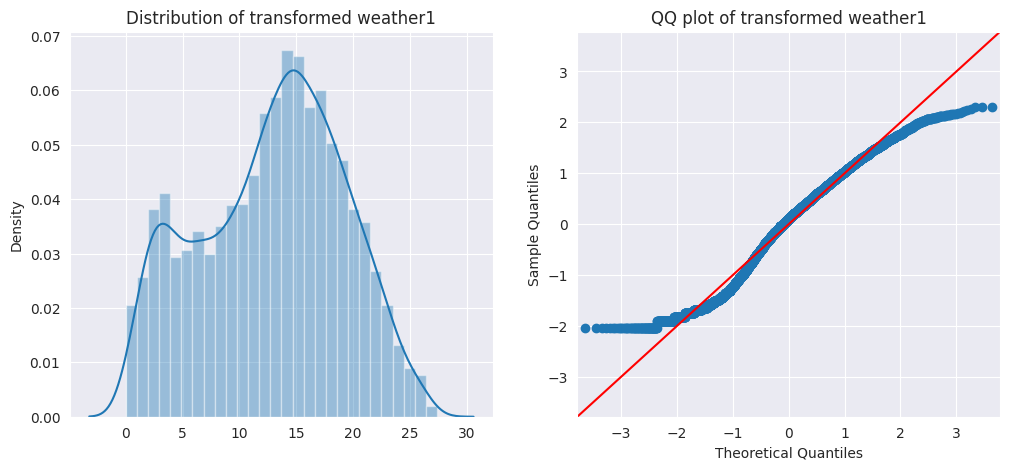

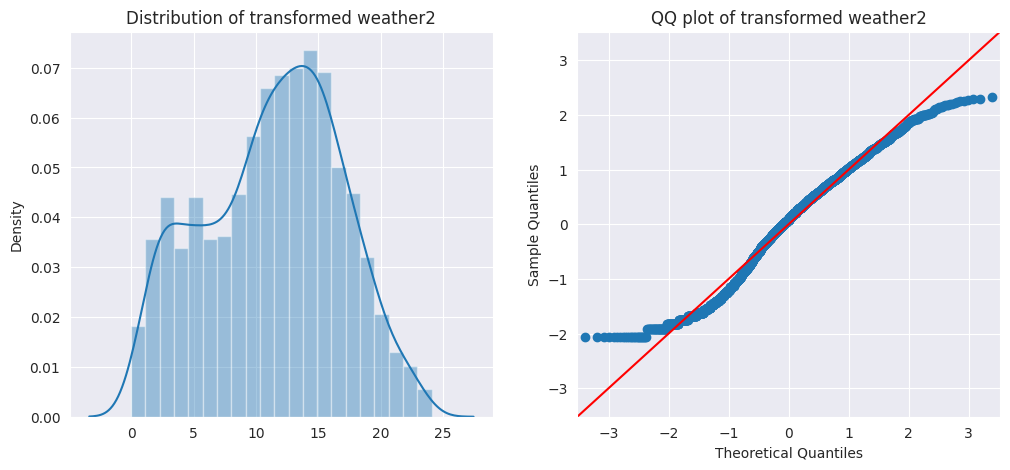

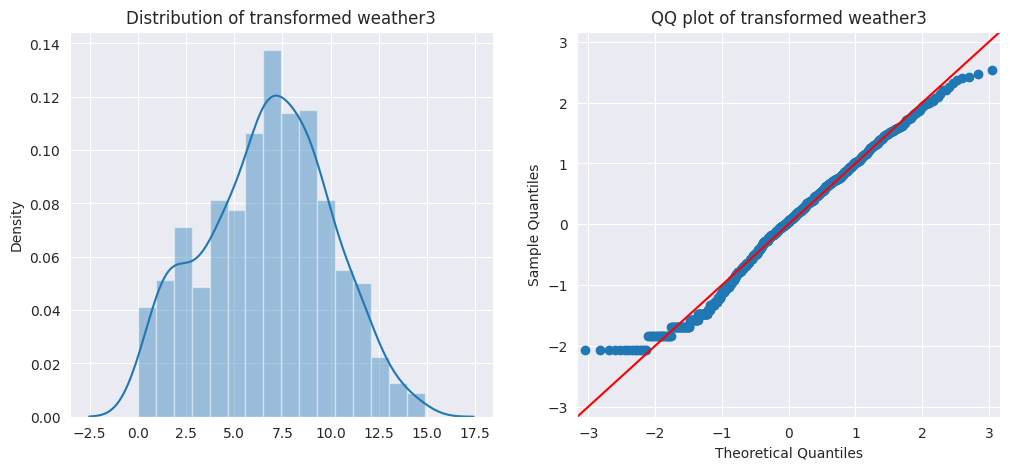

In [73]:
plt.rcParams['figure.figsize'] = (12,5)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed weather1')
sns.distplot(trans_weather1, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed weather1')
sm.qqplot(trans_weather1, line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed weather2')
sns.distplot(trans_weather2, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed weather2')
sm.qqplot(trans_weather2, line='45', fit=True, ax=ax)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title('Distribution of transformed weather3')
sns.distplot(trans_weather3, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.set_title('QQ plot of transformed weather3')
sm.qqplot(trans_weather3, line='45', fit=True, ax=ax)
plt.show()

# Variances after boxcox transformation
1. Variances are not roughly same

In [74]:
print(statistics.variance(trans_weather1))
print(statistics.variance(trans_weather2))
print(statistics.variance(trans_weather3))

39.81222373044738
30.03267718226274
10.486653464373509


# Plot all distributions after boxcox in same plot

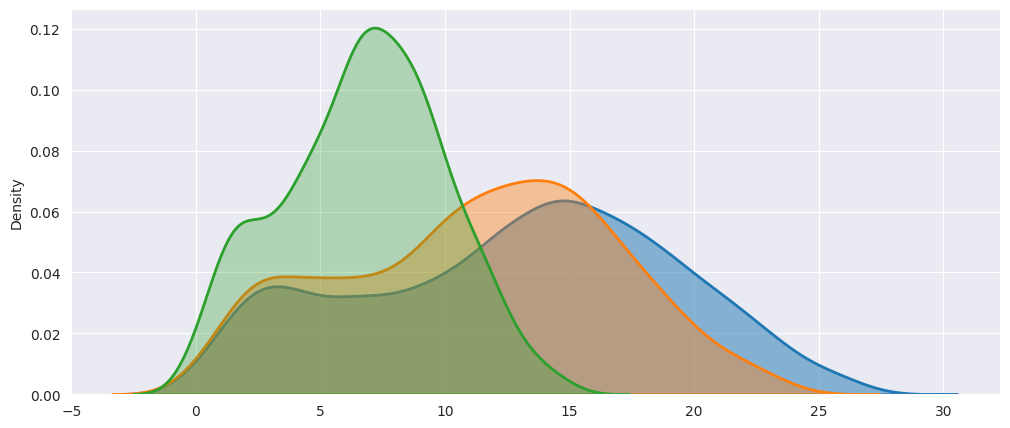

In [75]:
plt.rcParams['figure.figsize'] = (12,5)
sns.distplot(trans_weather1, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.5})
sns.distplot(trans_weather2, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.4})
sns.distplot(trans_weather3, hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2, 'alpha':0.3})
plt.show()

# Perform one-way Anova and calculate F-test statistics for weather1/2/3

In [76]:
scipy.stats.f_oneway(trans_weather1, trans_weather2, trans_weather3)

F_onewayResult(statistic=431.79686015294686, pvalue=3.4867243611236345e-181)

In [77]:
#Perform one-way Anova for weather2/3

In [78]:
scipy.stats.f_oneway(trans_weather2, trans_weather3)

F_onewayResult(statistic=543.8845401085881, pvalue=2.4627582984526356e-112)

# Interpretation at 5% significance level
1. p-value << alpha
2. Since p-value is very very small and less that 0.05, we reject the null hypothesis

# Conclusion
1. Mean number of cycles rented during weather1/2/3 are not the same

In [79]:
#Chi-Square Test

# Chi-Square Test
1. Test of independence
2. Non parametric test
3. For categorical variables

In [146]:
#Define null and alternate hypothesis
#Alpha = 5%

# Define hypothesis test
1. H0: The two categorical variables season and weather have no relationship (independent)
2. H1: There is relationship (dependent) between two categorical variables season and weather

In [140]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

# Prepare contingency table for season and weather against column count

In [141]:
df1 = df.groupby(['season','weather']).count()['count'].unstack('weather')
df1 = df1.reset_index()
df1.index = ['weather1','weather2','weather3','weather4']
df1 = df1.drop(['season'],axis=1)
df1.columns = ['season1','season2','season3','season4']

In [142]:
df1

season1  season2  season3  season4
weather1   1759.0    715.0    211.0      1.0
weather2   1801.0    708.0    224.0      NaN
weather3   1930.0    604.0    199.0      NaN
weather4   1702.0    807.0    225.0      NaN

# Dropping off season4 as there is no data to perform test on season4

In [143]:
observed = df1.drop(['season4'],axis=1)

In [144]:
observed

season1  season2  season3
weather1   1759.0    715.0    211.0
weather2   1801.0    708.0    224.0
weather3   1930.0    604.0    199.0
weather4   1702.0    807.0    225.0

# Perform chi-square test on observed data

In [145]:
scipy.stats.chi2_contingency(observed=observed)

(46.10145731073249,
 2.8260014509929343e-08,
 6,
 array([[1774.04869086,  699.06201194,  211.8892972 ],
        [1805.76352779,  711.55920992,  215.67726229],
        [1805.76352779,  711.55920992,  215.67726229],
        [1806.42425356,  711.81956821,  215.75617823]]))

# Interpretation
1. p-value << alpha 
2. Since p-value is very very small and less than alpha i.e. 0.05 we reject the null hypothesis

# Conclusion
1. We rejected null hypothesis
2. Two categorical variables season and weather are dependent on each other
3. Weather and season have relationship between them

In [157]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [166]:
#KS - Kolmogorov Smirnov test

# Kolmogorov Smirnov Test
1. Non-parametric test
2. Equality test of continuous distribution
3. Task if disb x = disb y
4. Test statistics under H0 is close to zero
5. Test statistics under H1 is larger +ve value

# Define Null and Alternate Hypothesis
1. H0: Distribution of temp = Distribution of atemp
2. H1: Distribution of temp != Distribution of atemp

In [177]:
#plot distributions using distplot

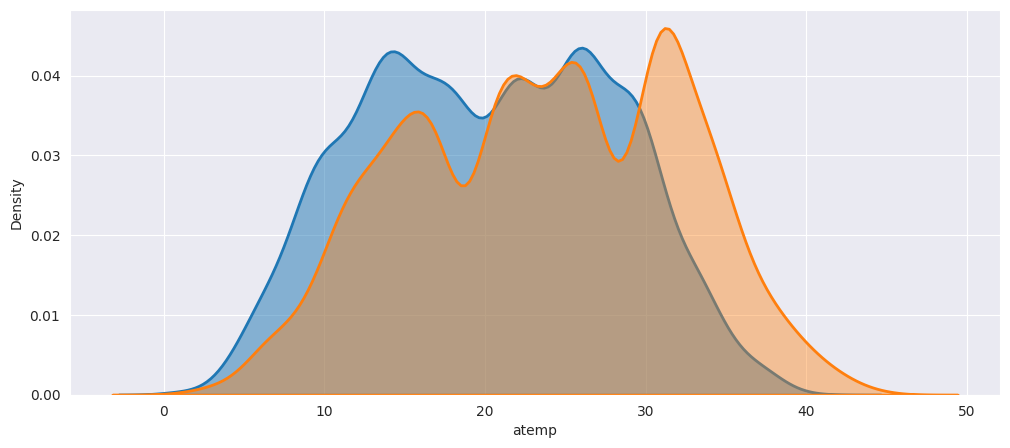

In [174]:
plt.rcParams['figure.figsize'] = (12,5)
sns.distplot(df['temp'], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2,'alpha':0.5})
sns.distplot(df['atemp'], hist=False, kde=True, kde_kws={'shade':True, 'linewidth':2,'alpha':0.4})
plt.show()

# CDF distributions of continuous variable temp and atemp

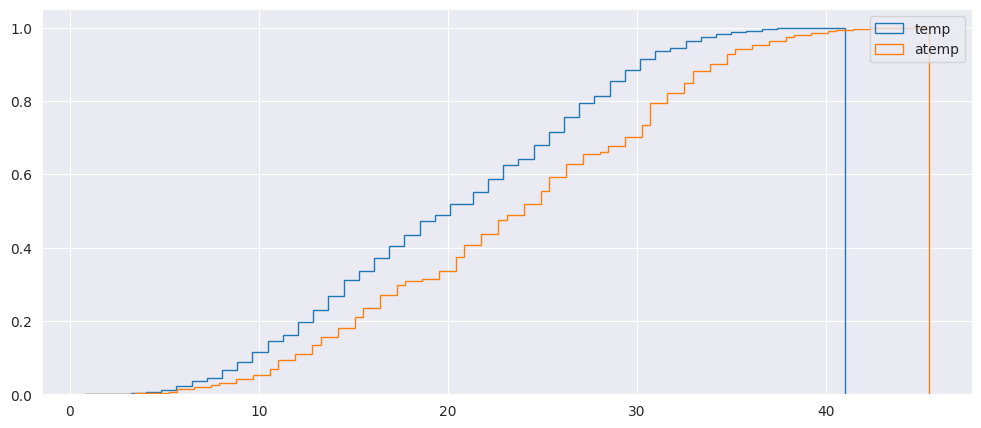

In [178]:
plt.rcParams['figure.figsize'] = (12,5)
plt.hist(df['temp'], bins=100, cumulative=True, label='temp', density=True, histtype='step')
plt.hist(df['atemp'], bins=100, cumulative=True, label='atemp', density=True, histtype='step')
plt.legend()
plt.show()

# Perform 2-Sample Kolmogorov Smirnov Test

In [176]:
scipy.stats.ks_2samp(df['temp'], df['atemp'])

KstestResult(statistic=0.20788168289546205, pvalue=8.551504729866235e-207)

# Interpretation
1. p-value << alpha (0.05)
2. Since p-value is very very small and less than alpha 5% we reject the null hypothesis

# Conclusion
1. Distributions of temp and atemp are not same